In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

In [3]:
M = 10
Ns = [0, 1, 3, 9]

In [27]:
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i) / float(num - 1)
        y = np.sin(2 * np.pi * x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index = ['x', 'y']), ignore_index=True)
    return dataset

In [28]:
train_set = create_dataset(M)
test_set = create_dataset(M)
df_ws = DataFrame()
print(train_set)

          x         y
0  0.000000 -0.203212
1  0.111111  1.246724
2  0.222222  1.034565
3  0.333333  0.548881
4  0.444444  0.256829
5  0.555556 -0.647707
6  0.666667 -0.935223
7  0.777778 -0.837260
8  0.888889 -1.116174
9  1.000000  0.451995


In [23]:
def resolve(dataset, n):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, n + 1):
        p = dataset.x ** i
        p.name = "x**%d" % i
        phi = pd.concat([phi, p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)
    
    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (w ** i)
        return y
    return (f, ws)

In [30]:
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ]
hoge
-0.0200581410039


ValueError: x and y must have same first dimension

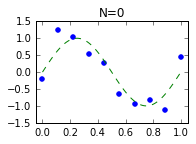

In [35]:
fig = plt.figure()

for c, n in enumerate(Ns):
    f, ws = resolve(train_set, n)
    df_ws = df_ws.append(Series(ws,name="N=%d" % n))

    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("N=%d" % n)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

    # 真の曲線を表示
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0,1,101)
    liney = f(linex)
    print(linex)
    print("hoge")
    print(liney)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)

# 係数の値を表示
print("Table of the coefficients")
print(df_ws.transpose())
fig.show()

# トレーニングセットとテストセットでの誤差の変化を表示
df = DataFrame(columns=['Training set','Test set'])
for m in range(0,10):   # 多項式の次数
    f, ws = resolve(train_set, m)
    train_error = rms_error(train_set, f)
    test_error = rms_error(test_set, f)
    df = df.append(
            Series([train_error, test_error],
                index=['Training set','Test set']),
            ignore_index=True)
df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))
plt.show()